In [1]:
!pip install tempdisagg

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear un ejemplo reproducible
np.random.seed(42)

# Simular una serie de alta frecuencia (mensual) con una tendencia clara
months = list(range(1, 13)) * 3  # 3 años
years = sum([[y]*12 for y in range(2020, 2023)], [])
X = np.linspace(100, 300, 36) + np.random.normal(0, 10, 36)

# Crear una serie de baja frecuencia (anual) como suma de X
y_agg = [X[i:i+12].sum() for i in range(0, len(X), 12)]
y = sum([[val]*12 for val in y_agg], [])

df = pd.DataFrame({
    "Index": years,
    "Grain": months,
    "y": y,
    "X": X
})

# Introducir algunos valores faltantes en y
df.loc[df["Grain"] != 1, "y"] = np.nan

In [3]:
from tempdisagg import TempDisaggModel

model = TempDisaggModel(method="chow-lin-opt", conversion="average", verbose=False)
model.fit(df)
y_hat = model.predict()


In [5]:
y_hat.shape

(36, 1)

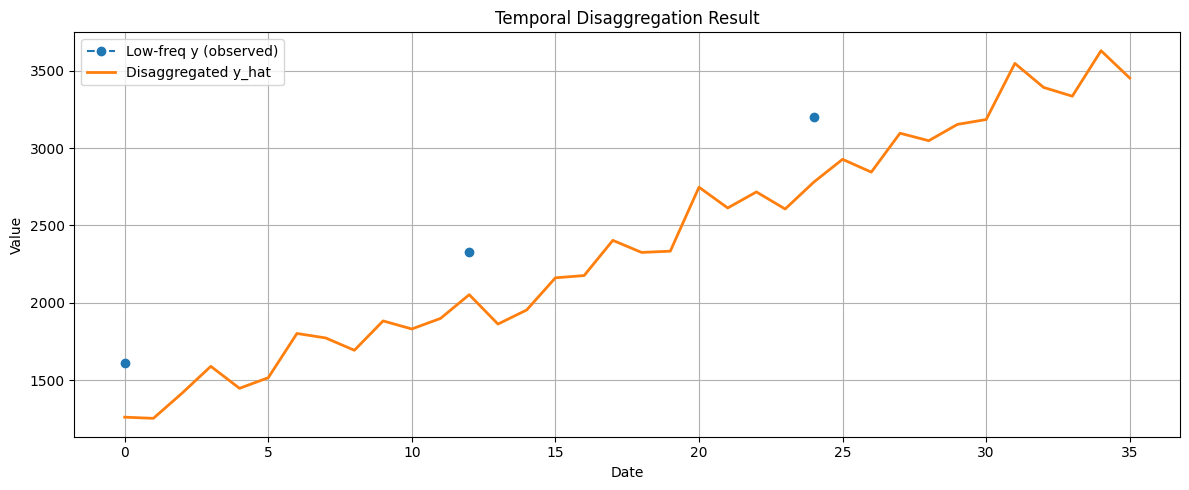

In [6]:
model.plot(df)

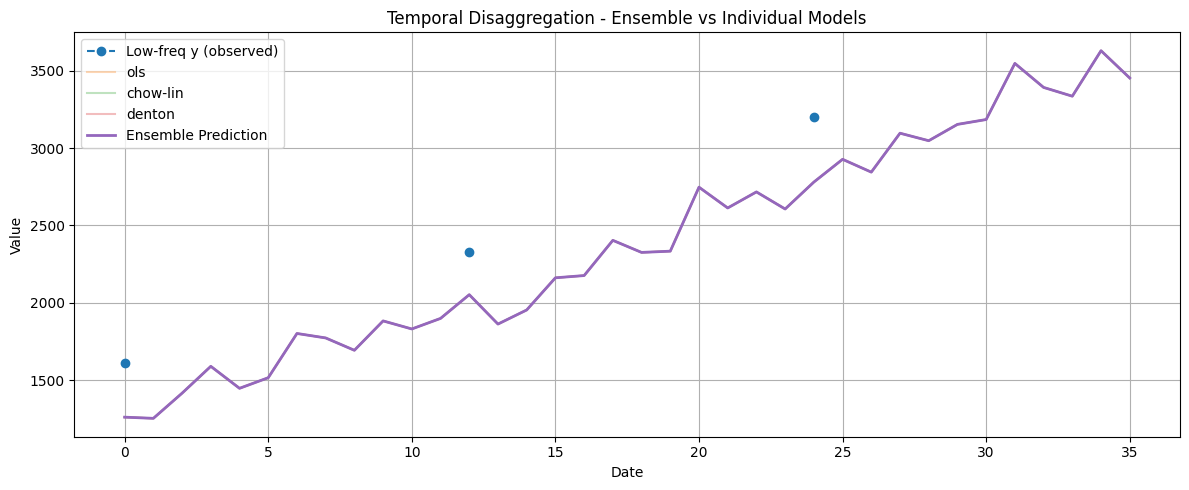


Temporal Disaggregation Model Summary

Ensemble Prediction Summary

Method: ols | Weight: 0.3333

Temporal Disaggregation Model Summary

Method: ols
       Coef.    Std.Err.          t-stat       P>|t| Signif.       Score
12.000000000 0.000806166 14885.262818683 0.000000000     *** 0.000000000

Method: chow-lin | Weight: 0.3333

Temporal Disaggregation Model Summary

Method: chow-lin
Estimated rho: 0.5000
       Coef.    Std.Err.          t-stat       P>|t| Signif.       Score
12.000000000 0.000806166 14885.262818683 0.000000000     *** 0.000000000

Method: denton | Weight: 0.3333

Temporal Disaggregation Model Summary

Method: denton
       Coef.    Std.Err.          t-stat       P>|t| Signif.       Score
12.000000000 0.000806166 14885.262818683 0.000000000     *** 0.000000000


In [7]:
model = TempDisaggModel(conversion="average")
model.ensemble(df, methods=["ols", "chow-lin", "denton"])
model.plot(df)
model.summary()

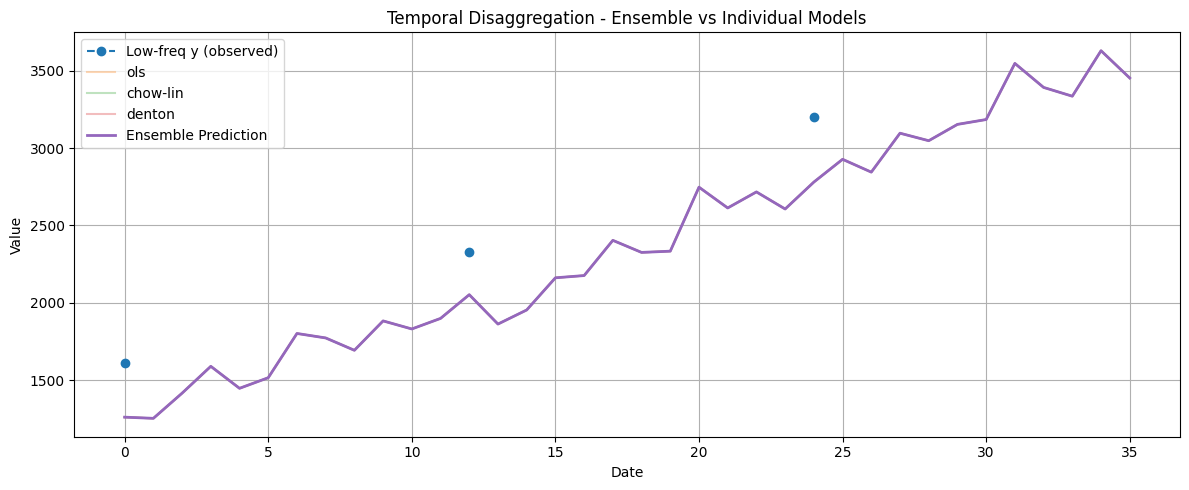

In [8]:
model.adjust_output(df)
model.plot(df, use_adjusted=True)